# Comnputer Vision: tagging images with Azure

## Install Azure CV Client

In [1]:
# !pip install --upgrade azure-cognitiveservices-vision-computervision

In [2]:
# !pip install opencv-python 


## Import libraries

In [3]:
from GlobalVariables import END_POINT, KEY_ONE as KEY

In [4]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

In [24]:
from PIL import Image
import requests
import matplotlib.pyplot as plt 
import matplotlib.patches as patches 

## Use some pictures to check the client 

In [46]:
image_url = 'https://images.unsplash.com/photo-1630963709118-70193c50acdc?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=334&q=80'

In [34]:
image = Image.open(requests.get(image_url, stream=True).raw)

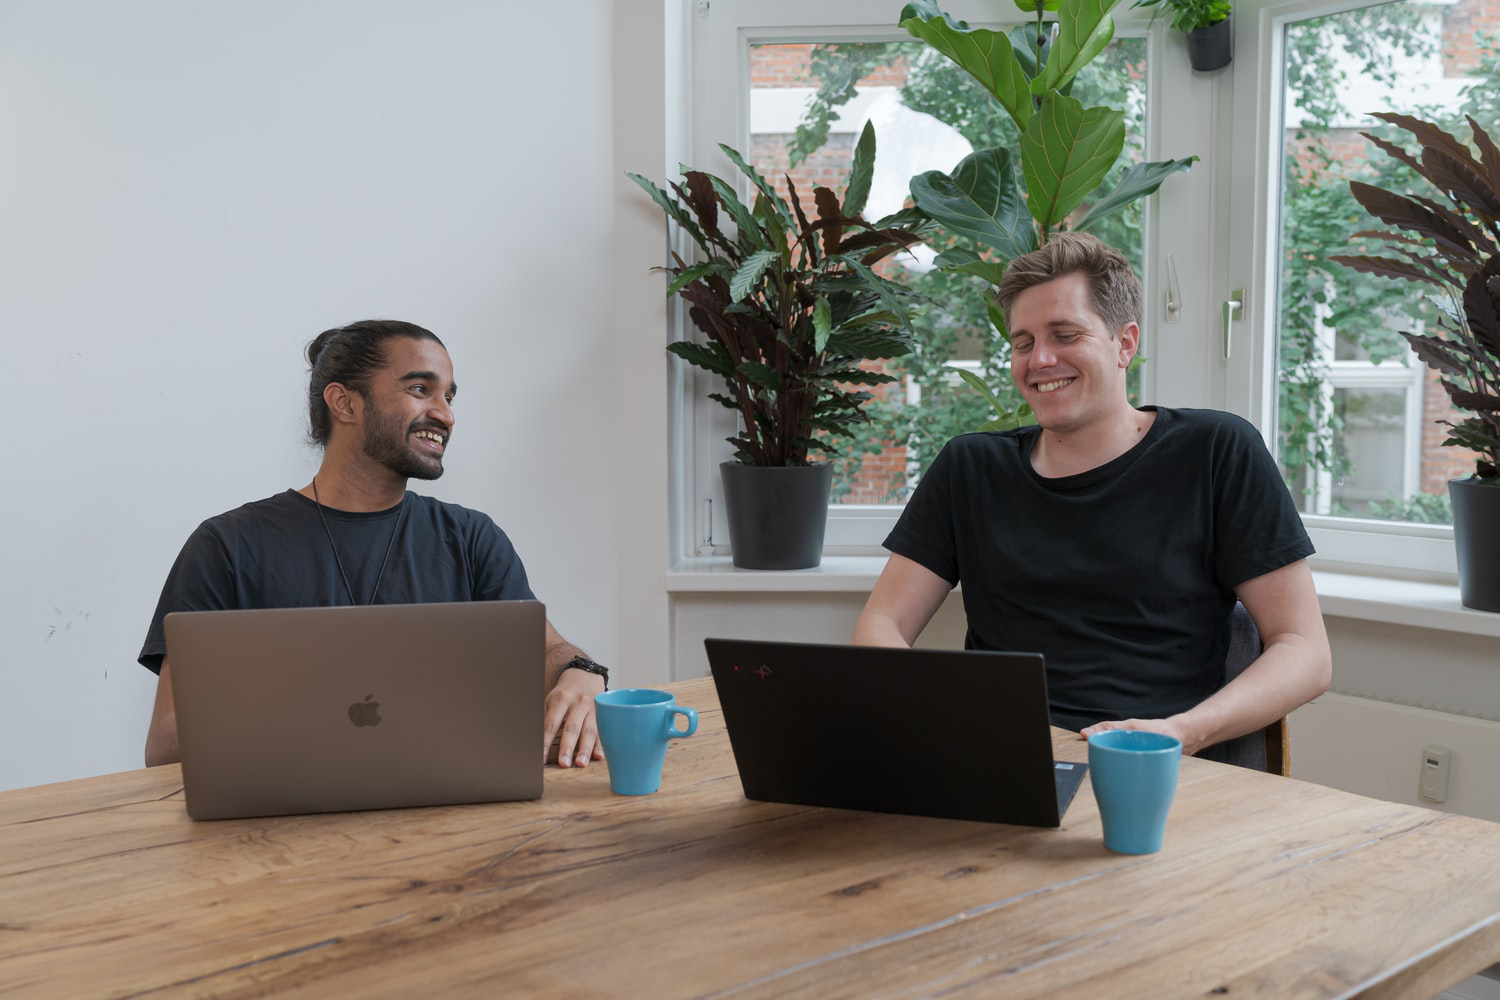

In [35]:
image

In [36]:
client = ComputerVisionClient(
    endpoint=END_POINT,
    credentials=CognitiveServicesCredentials(KEY)
)

In [37]:
client 

In [38]:
image_description = client.describe_image(image_url)

In [39]:
image_description.tags

['person', 'laptop', 'man']

In [40]:
for caption in image_description.captions:
    print(caption.text)

a couple of men sitting at a table with laptops


In [41]:
image_objects = client.detect_objects(image_url)

In [43]:
for object in image_objects.objects:
    print(object.object_property)
    print(object.confidence)
    print(object.rectangle)

plant
0.513
{'additional_properties': {}, 'x': 874, 'y': 1, 'w': 342, 'h': 458}
plant
0.736
{'additional_properties': {}, 'x': 639, 'y': 102, 'w': 316, 'h': 477}
plant
0.547
{'additional_properties': {}, 'x': 1275, 'y': 51, 'w': 225, 'h': 531}
person
0.798
{'additional_properties': {}, 'x': 130, 'y': 319, 'w': 459, 'h': 424}
person
0.871
{'additional_properties': {}, 'x': 851, 'y': 229, 'w': 472, 'h': 551}
Laptop
0.856
{'additional_properties': {}, 'x': 147, 'y': 607, 'w': 427, 'h': 230}
Laptop
0.763
{'additional_properties': {}, 'x': 699, 'y': 628, 'w': 393, 'h': 198}


In [44]:
def add_boxes_to_image(image, predictions):
    for object in predictions.objects:
        # print object name 
        print(object.object_property)
        # set rectangle 
        x = object.rectangle.x
        y = object.rectangle.y
        width = object.rectangle.w
        height = object.rectangle.h
        # plot image 
        figure, ax = plt.subplots(1)
        ax.axis('off')
        rectangle = patches.Rectangle((x,y), width, height, edgecolor='r', facecolor='none')
        ax.imshow(image)
        ax.add_patch(rectangle)
        plt.show()
    

plant


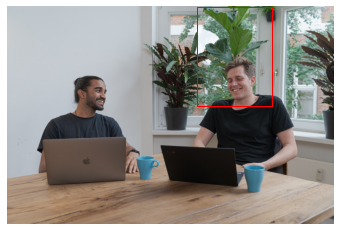

plant


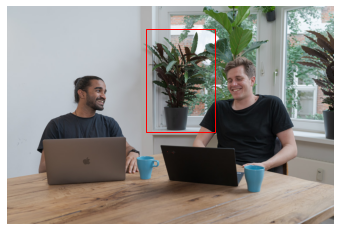

plant


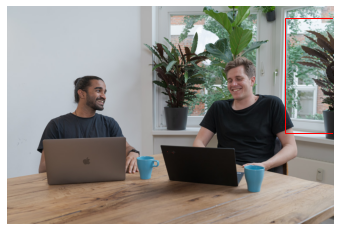

person


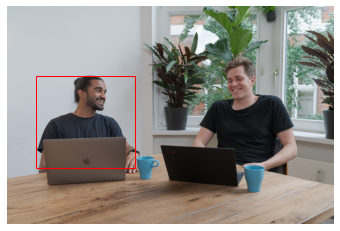

person


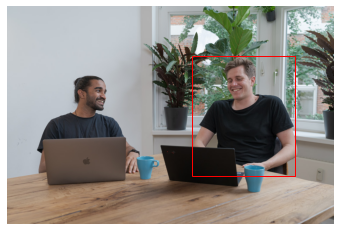

Laptop


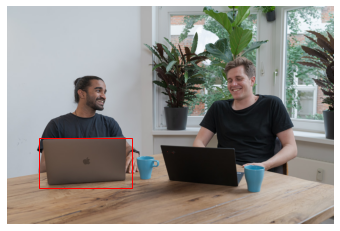

Laptop


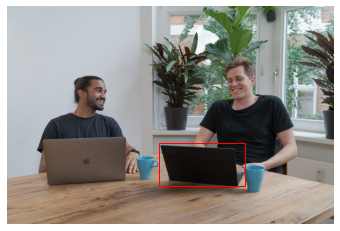

In [45]:
add_boxes_to_image(image, image_objects)